# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [18]:
# Your code here.
import pandas as pd
student_data = pd.DataFrame({'StudentID': [i for i in range(1,11)], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]}).set_index(['StudentID'])
student_data

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

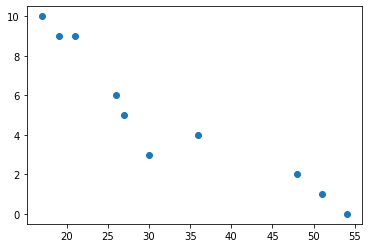

In [21]:
# Your code here.
import matplotlib.pyplot as plt
plt.scatter(student_data['Age'],student_data['Tardies'])


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [22]:
# Your response here. 
#they seemm to have a negative correlation

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [37]:
# Your response here.
#correlation:
student_data['Age'].corr(student_data['Tardies'])

#covariance:
student_data['Age'].cov(student_data['Tardies'])

#Despite the difference in magnitude of the two values, they both show the same result. That the variables oppositely effect eachother

-45.56666666666666

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [40]:
# Your response here.
from scipy import stats
x = student_data['Age']
y = student_data['Tardies']
results = stats.linregress(x,y)
results_line = results.intercept+results.slope*x


Plot your regression model on your scatter plot.

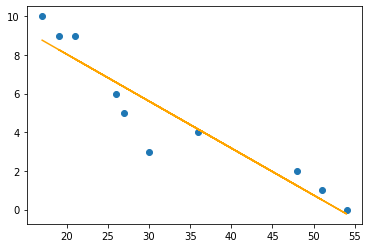

In [41]:
# Your code here.
plt.plot(x, results_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [42]:
# Your response here. 
#Yes it seems as though these two variables are closely linked, and therefore that age is indeed a good predictor of tardiness

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [46]:
# Import any libraries you may need & the data
import statsmodels.api as sm
co2 = pd.read_csv('vehicles.csv')
co2.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [112]:
# Your response here. 
ind = ['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']
dep = ['CO2 Emission Grams/Mile']

for column in ind:
    print((column,co2[column].corr(co2['CO2 Emission Grams/Mile'])))

('Year', -0.22223928151365277)
('Cylinders', 0.7523732671093949)
('Fuel Barrels/Year', 0.986187362281351)
('Combined MPG', -0.9262333626086402)
('Fuel Cost/Year', 0.9308618638982565)


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [59]:
# Your response here. 
x = co2[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y = co2['CO2 Emission Grams/Mile']

model = sm.OLS(y,x).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [60]:
# Your response here. 
model.summary()

#the most important variabes are Fuel Barrels/Year and Combined MPG, as they have the highest coefficients, implying
#the strongest correlation.

#I can conclude that the Fuel Barrels/Year and Combined MPG are the best predictors of CO2 emmisions, and that 
#the model is very accurate due to the R-squared of nearly 1. This R-squared value makes me very confident of my conclusions

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Sun, 08 Nov 2020   Prob (F-statistic):                        0.00
Time:                             21:40:29   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [102]:
# Your code here.
x = [1,3,4,5,8,9,11,14]
y = [1,2,4,4,5,7,8,13]
error_data = pd.DataFrame()
error_data['X'] = x
error_data['Y'] = y
#error_data = error_data.style.hide_index()
error_data

,X,Y
0,1,1
1,3,2
2,4,4
3,5,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

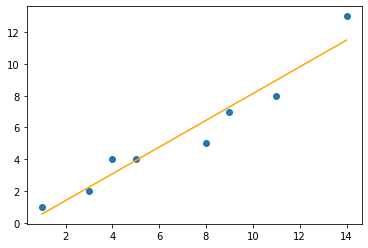

In [103]:
# Your code here.
x = error_data['X']
y = error_data['Y']

results = stats.linregress(x,y)
results_line = results.intercept+results.slope*x
plt.plot(x, results_line, c = 'orange')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [104]:
# Your response here. 
results.rvalue**2
#They likely have a strong positive correlation

0.9363971724000072

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

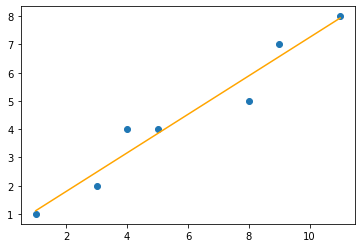

In [105]:
# Your response here. 
error_data.drop(error_data.tail(1).index,inplace=True)
x = error_data['X']
y = error_data['Y']
results = stats.linregress(x,y)
results_line = results.intercept+results.slope*x
plt.plot(x, results_line, c = 'orange')
plt.scatter(x,y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [107]:
# Your response here. 
results.rvalue**2
#the data without the problematic datapoint shows a stronger correlation, and seems to be a better fit

0.9483003830122791